## **1. Introdução**

O presente relatório trata-se de análise resumida com o objetivo de identificar o perfil dos clientes que saíram do banco no período analisado.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from importlib import reload 
plt=reload(plt)
sns.set_style('white')




In [ ]:
df_churn = pd.read_csv('churn.csv')
arr_delete = ['CustomerId', 'Surname']
df_churn.drop(arr_delete, axis=1, inplace = True)
df_churn


,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df_churn.describe()

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
def calculo_porcetagem(coluna):
  resultado_exited = df_churn[['Exited',coluna]].groupby([coluna, 'Exited']).size()
  resultado_total = df_churn.groupby(coluna).size()
  return round(resultado_exited/resultado_total*100,2).reset_index( name = 'Percentage')

## **2. Análise das Dados**
A análise foi realizada relacionando individualmente cada variável e  a variável de estudo, "Exited". Assim, foi possível verificar o impacto de cada uma separadamente. Segue a análise das variáveis com maior relevância para o churn de clientes.

**2.1 Adesão à Produtos**

Observa-se que há um maior churn para clientes com 3 e 4 produtos, além disso, destaca-se 100% de churn para clientes com 4 produtos. Necessário validação da equipe de négocio sobre esse aspecto e uma análise mais profunda desses produtos, pois trata-se de um ponto de alerta importante para a empresa.

*   27% do clientes que possuem 1 produto saíram
*   7% do clientes que possuem 2 produto saíram
*   82% do clientes que possuem 3 produto saíram
*   100% do clientes que possuem 4 produto saíram




In [ ]:
plot_produtos = calculo_porcetagem('NumOfProducts')
plot_produtos

,NumOfProducts,Exited,Percentage
0,1,0,72.29
1,1,1,27.71
2,2,0,92.42
3,2,1,7.58
4,3,0,17.29
5,3,1,82.71
6,4,1,100.00


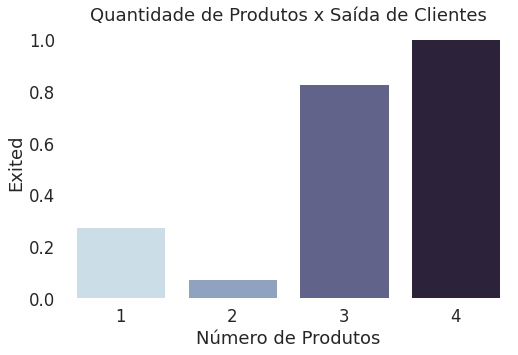

In [ ]:
plt.figure(figsize=(8, 5))

sns.barplot(data=df_churn, x='NumOfProducts', y= "Exited", palette="ch:s=.25,rot=-.25", ci=None)
plt.xlabel('Número de Produtos')
sns.despine(left=True, bottom=True)
plt.title('Quantidade de Produtos x Saída de Clientes')
plt.show()



**2.2 Idade**

O gráfico abaixo nos mostra uma maior rotatividade de clientes com  idades entre 45 a 60 anos aproximadamente.

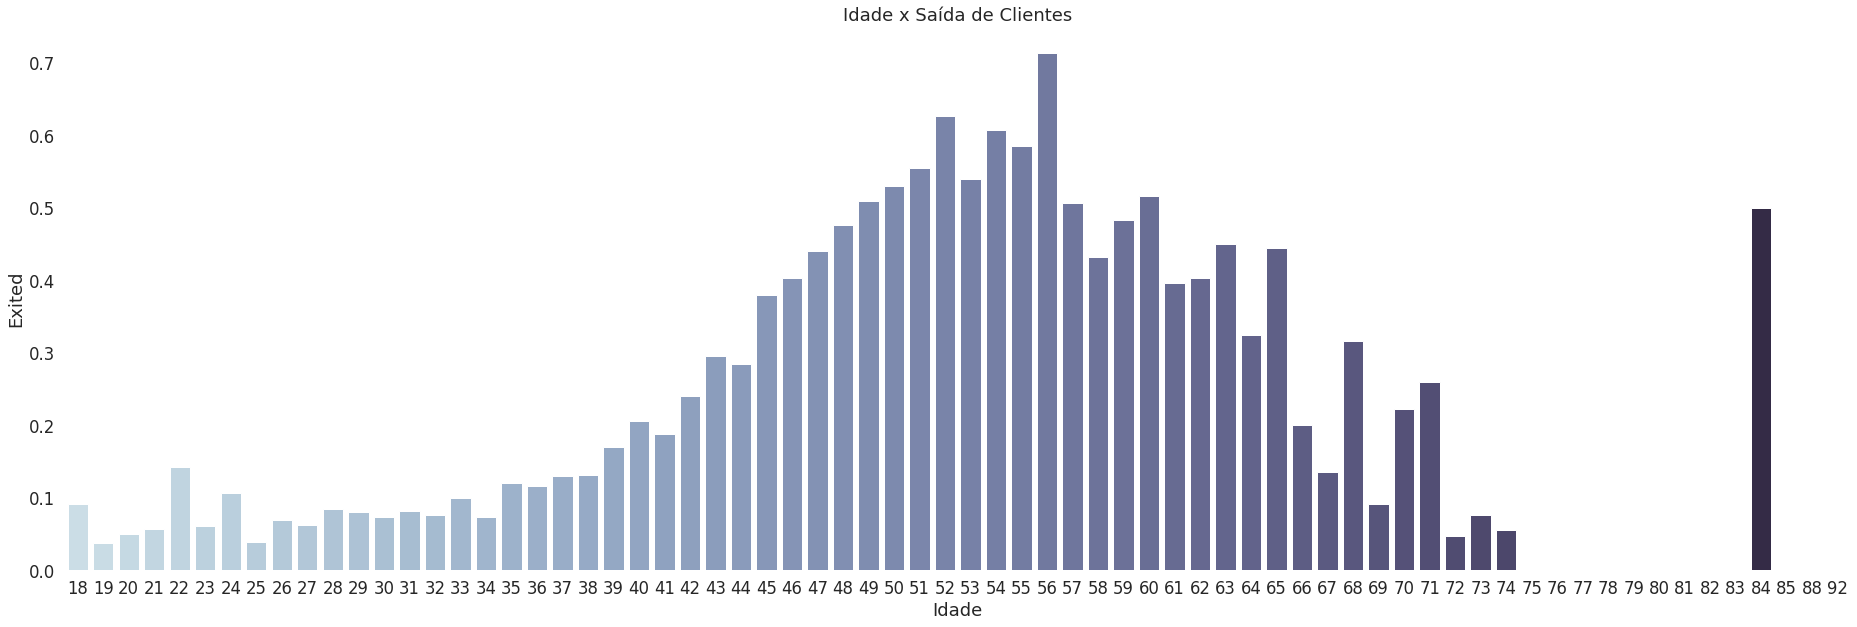

In [ ]:
plt.figure(figsize=(32, 10))
sns.barplot(data=df_churn, x='Age', y= "Exited",palette="ch:s=.25,rot=-.25", ci=None)
plt.xlabel('Idade');
plt.title('Idade x Saída de Clientes')
sns.despine(left=True, bottom=True )
plt.show()

**2.3 Sexo**

Constatou-se que 25% do churn foi do sexo feminino e 16% masculino. 


In [ ]:
df_churn['Gender'] = df_churn['Gender'].replace(['Female','Male'], ['Feminino' , 'Masculino'])
plot_sexo = calculo_porcetagem('Gender')
plot_sexo


,Gender,Exited,Percentage
0,Feminino,0,74.93
1,Feminino,1,25.07
2,Masculino,0,83.54
3,Masculino,1,16.46


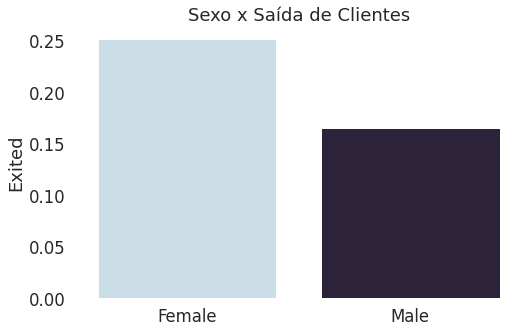

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df_churn, x='Gender', y= "Exited" ,palette="ch:s=.25,rot=-.25", ci=None)
plt.title('Sexo x Saída de Clientes')
plt.xlabel(None)
sns.despine(left=True, bottom=True)
plt.show()


**2.4 Análise Geográfica**

Têm-se que do total de clientes, 16% dos franceses saíram, 16% espanhóis e 32% dos alemães.

In [ ]:
df_churn['Geography'] = df_churn['Geography'].replace(['France','Germany', 'Spain'], ['França' , 'Alemanha', 'Espanha'])
plot_Geography = calculo_porcetagem('Geography')
plot_Geography

,Geography,Exited,Percentage
0,Alemanha,0,67.56
1,Alemanha,1,32.44
2,Espanha,0,83.33
3,Espanha,1,16.67
4,França,0,83.85
5,França,1,16.15


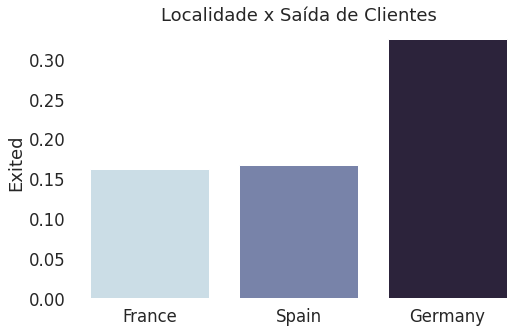

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df_churn, x='Geography', y= "Exited",palette="ch:s=.25,rot=-.25", ci=None)
plt.title('Localidade x Saída de Clientes')
plt.xlabel(None)
sns.despine(left=True, bottom=True)
plt.show()


**2.5 Análise da interação dos clientes com o banco**

Clientes que não são membros ativos têm maior churn que membros ativos.

In [ ]:
df_churn['IsActiveMember'] = df_churn['IsActiveMember'].replace([0,1], ['Não', 'Sim'])
plot_IsActiveMember = calculo_porcetagem('IsActiveMember')
plot_IsActiveMember

,IsActiveMember,Exited,Percentage
0,Não,0,73.15
1,Não,1,26.85
2,Sim,0,85.73
3,Sim,1,14.27


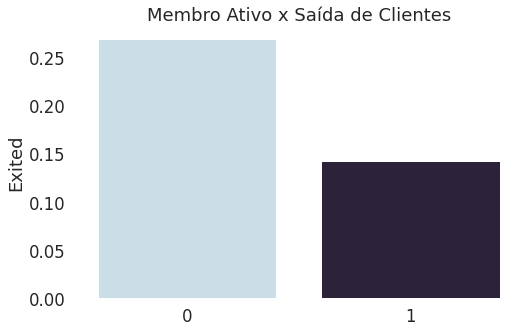

In [ ]:
plt.figure(figsize=(8, 5))

sns.despine(left=True, bottom=True)
sns.barplot(data=df_churn, x='IsActiveMember', y= "Exited",palette="ch:s=.25,rot=-.25", ci=None)
plt.title('Membro Ativo x Saída de Clientes')
sns.despine(left=True, bottom=True)
plt.xlabel(None)

plt.show()

**2.5 Score**

Nota-se que clientes com baixo score, tendem a sair mais.

In [ ]:
bins = [350,450,550,650,750,850]
labels = ['350-450', '450-550', '550-650','650-750','750-850']

df_churn['Score_group'] = pd.cut(df_churn['CreditScore'], bins=bins, labels=labels, include_lowest=True)


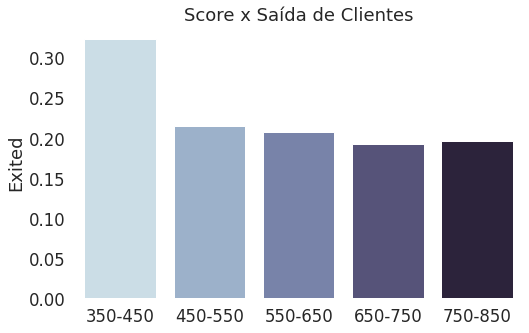

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df_churn, x='Score_group', y= "Exited",palette="ch:s=.25,rot=-.25", ci=None)
plt.title('Score x Saída de Clientes')
plt.xlabel(None)
sns.despine(left=True, bottom=True)
plt.show()

**2.6 Saldo Bancário**

Clientes com maiores valores em conta, entre 200 mil a 251 mil, foram os que mais saíram.

In [ ]:
bins = [0,50000,100000,150000,200000,251000]
labels = ['0-50k', '50k-100k', '100k-150k','150k-200k','200k-251k']

df_churn['Balance_group'] = pd.cut(df_churn['Balance'], bins=bins, labels=labels, include_lowest=True)

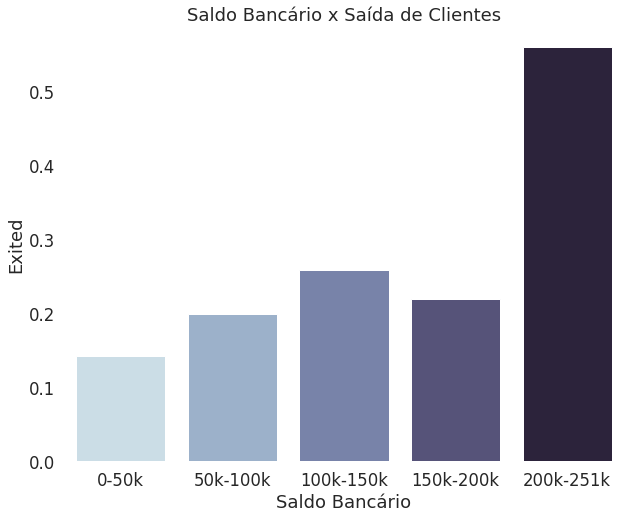

In [ ]:
plt.figure(figsize=(10, 8))
sns.barplot(data=df_churn, x='Balance_group', y= "Exited",palette="ch:s=.25,rot=-.25", ci=None)
plt.title('Saldo Bancário x Saída de Clientes')
plt.xlabel('Saldo Bancário')
sns.despine(left=True, bottom=True)
plt.show()

# **3. Conclusão**

Ao analisar os dados fornecidos, conclui-se que o perfil  dos clientes que possuem maior tedência a encerrarem seu relacionamento com o banco são  clientes da alemanha, do sexo feminino, score de crédito baixo, saldo bancário elevado, idade entre 45 a 60 anos, com três a quatro produtos e que não são membros ativos.

Ressalta-se a importância de uma análise mais detalhada desses dados, em especial, dos produtos consumidos por esses clientes e saldo bancário, realizando um detalhamento do tipo do produto que os clientes que saíram possuíam e como foi realizada essa venda, para então, poder ter conclusões mais assertivas nesse quesito.
E expandir esse detalhamento com a procedência do saldo em conta desses clientes, pois esse fato é um alerta significativo da perda de potenciais bons clientes.